# Node Embeddings Clustering and Profiling

In [2]:
import os
import pandas as pd

os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))

from config import PATH

SEED = 42

In [2]:
emb_df = pd.read_csv(PATH + 'node_embeddings.csv')

In [3]:
n_rows = emb_df.shape[0]

embedding_cols = emb_df.columns.to_list()
embedding_cols.remove('user_id')

# Remove zeros
emb_df = emb_df.loc[~(emb_df[embedding_cols] == 0.0).all(axis=1)]
print('Removed zero embeddings:')
print(f"Nodes remaining = {emb_df.shape[0]}/{n_rows}")

Removed zero embeddings:
Nodes remaining = 19429/677640


In [4]:
nodes_df = pd.read_csv(PATH + 'node_features.csv')
node_columns = nodes_df.columns.tolist()
node_columns.remove('user_id')
df = nodes_df.merge(emb_df, on="user_id", how="inner")

In [5]:
metrics_df = pd.read_csv(PATH + 'graph_metrics.csv')
metrics_df.rename(columns={"node": "user_id"}, inplace=True)
metrics_columns = metrics_df.columns.tolist()
metrics_columns.remove('Unnamed: 0')
metrics_columns.remove('user_id')  
df = df.merge(metrics_df, on="user_id", how="inner")
df.head()

,user_id,user_rt,num_post,user_time_rt,num_post_unverified,num_post_non-rumor,num_post_true,num_post_false,num_rt_unverified,num_rt_non-rumor,...,emb_9,emb_10,emb_11,Unnamed: 0,in_degree,out_degree,katz,eigenvector,pagerank,betweenness
0,1000157142,2,0,3.775,0,0,0,0,0,0,...,3.519199,-2.032025,-1.165162,490687,2,2,0.001338,3.768125e-09,0.000002,2.0
1,1000228238,2,0,29.650,0,0,0,0,0,0,...,0.009075,0.006395,0.009014,138774,2,5,0.001271,3.848015e-06,0.000001,45830.0
2,1000424378,1,0,3.180,0,0,0,0,0,1,...,0.044873,0.044618,0.080977,106472,1,5,0.001238,1.489122e-08,0.000001,20.0
3,100084513,3,0,15.950,0,0,0,0,1,2,...,0.174872,0.034832,-0.076246,10498,3,3,0.001403,3.582313e-06,0.000003,34454801.0
4,1001017003,1,0,4.420,0,0,0,0,0,0,...,1.096398,-3.193800,-2.022495,184330,1,2,0.001201,5.430364e-11,0.000002,0.0


In [6]:
df[node_columns].describe()

,user_rt,num_post,user_time_rt,num_post_unverified,num_post_non-rumor,num_post_true,num_post_false,num_rt_unverified,num_rt_non-rumor,num_rt_true,num_rt_false,score,rt_total
count,19429.000000,19429.000000,1.942900e+04,19429.000000,19429.000000,19429.000000,19429.000000,19429.000000,19429.000000,19429.000000,19429.000000,19429.000000,19429.000000
mean,2.629626,0.108961,4.468981e+03,0.020639,0.029801,0.029389,0.029132,0.509445,0.828813,0.607751,0.683617,0.427764,46.269597
std,3.592342,1.334330,8.046938e+04,0.197879,0.987823,0.370731,0.302647,1.104894,2.326949,1.243465,1.243434,1.821189,799.263922
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.800000,0.000000
25%,1.000000,0.000000,4.730000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000007,0.000000
50%,2.000000,0.000000,3.195000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025579,0.000000
75%,3.000000,0.000000,1.972700e+02,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.748780,0.000000
max,139.000000,80.000000,2.372812e+06,8.000000,72.000000,17.000000,15.000000,25.000000,86.000000,30.000000,27.000000,90.200000,59893.000000


In [7]:
df[metrics_columns].describe()

,in_degree,out_degree,katz,eigenvector,pagerank,betweenness
count,19429.000000,19429.000000,19429.000000,1.942900e+04,19429.000000,1.942900e+04
mean,2.358896,37.034021,0.001391,3.265356e-04,0.000002,6.583429e+05
std,2.444551,543.826800,0.000408,3.651803e-03,0.000002,1.061605e+07
min,0.000000,1.000000,0.001046,5.739963e-22,-0.000126,0.000000e+00
25%,1.000000,1.000000,0.001164,9.630060e-15,0.000001,3.000000e+00
50%,2.000000,2.000000,0.001278,2.161465e-10,0.000001,3.700000e+01
75%,3.000000,4.000000,0.001440,2.198604e-06,0.000003,7.242000e+03
max,44.000000,35379.000000,0.008743,2.492946e-01,0.000093,3.764337e+08


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df[embedding_cols])

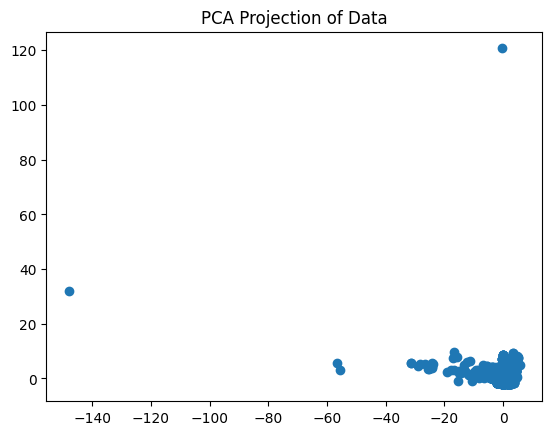

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

plt.scatter(X_2D[:, 0], X_2D[:, 1])
plt.title("PCA Projection of Data")
plt.show()

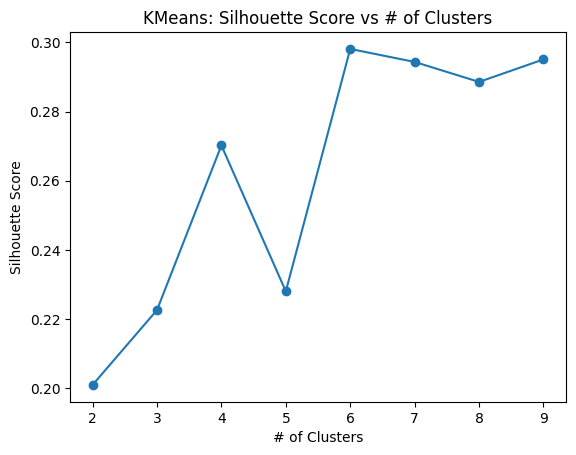

In [10]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

cluster_range = range(2, 10)

scores   = []
inertias = []
for k in cluster_range:
    model = KMeans(n_clusters=k, random_state=SEED)
    model.fit(X)

    scores.append(silhouette_score(X, model.labels_))
    inertias.append(model.inertia_)
    
plt.plot(cluster_range, scores, marker='o')
plt.title("KMeans: Silhouette Score vs # of Clusters")
plt.xlabel("# of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

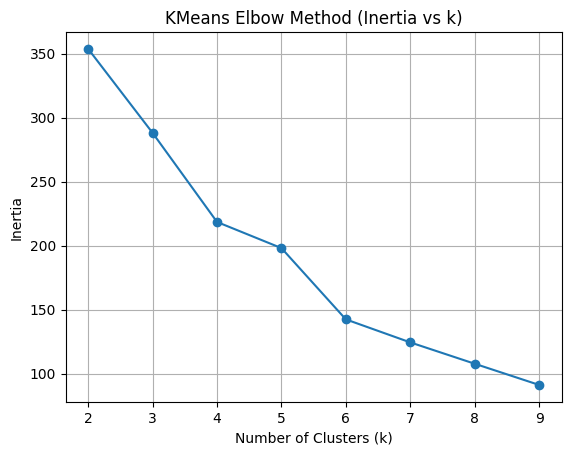

In [11]:
plt.plot(cluster_range, inertias, marker='o')
plt.title("KMeans Elbow Method (Inertia vs k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

<Axes: xlabel='cluster'>

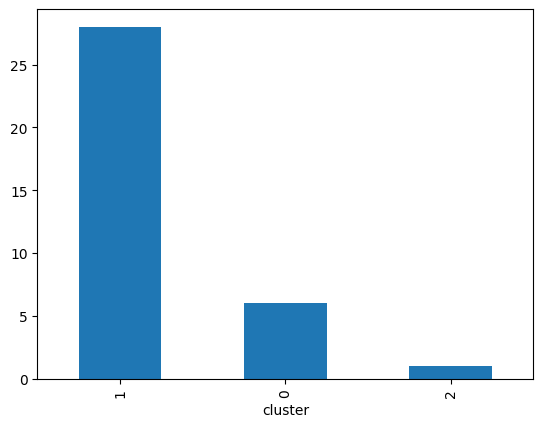

In [12]:
model = KMeans(n_clusters=3, random_state=SEED)
model.fit(X)
df['cluster'] = model.labels_
df['cluster'].value_counts().plot(kind='bar')

In [13]:
df.groupby('cluster')['betweenness'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,6.0,1.546386e+05,3.394856e+05,0.0,0.000000e+00,1.174858e+04,4.959667e+04,846038.0
1,28.0,7.294308e+05,2.028440e+06,0.0,4.583333e-01,2.408000e+03,6.653475e+04,9389886.0
2,1.0,1.018671e+06,NaN,1018671.0,1.018671e+06,1.018671e+06,1.018671e+06,1018671.0


In [14]:
df.groupby('cluster')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,6.0,-0.144608,0.465259,-0.804769,-0.419794,0.000000,1.235537e-10,0.496845
1,28.0,0.487176,3.008340,-9.689041,-0.667191,0.239725,2.241765e+00,5.706717
2,1.0,0.797737,NaN,0.797737,0.797737,0.797737,7.977365e-01,0.797737


In [10]:
df_to_remove = df[df['score'] < 0]
df_to_remove.shape[0]

5603

In [11]:
df_to_remove["betweenness"].describe()

count    5.603000e+03
mean     6.427988e+05
std      8.622262e+06
min      0.000000e+00
25%      2.000000e+00
50%      3.600000e+01
75%      9.179000e+03
max      2.842791e+08
Name: betweenness, dtype: float64

In [12]:
df_to_remove['user_id'].to_csv('network/nodes_to_remove/nodes_to_remove.txt', index=False, header=False)

In [18]:
df["score"].describe()

count    35.000000
mean      0.387743
std       2.698478
min      -9.689041
25%      -0.547098
50%       0.130222
75%       2.210888
max       5.706717
Name: score, dtype: float64

In [3]:
df = pd.read_csv(PATH + 'node_features.csv')
metrics_df = pd.read_csv(PATH + 'graph_metrics.csv')
metrics_df.rename(columns={"node": "user_id"}, inplace=True)
metrics_columns = metrics_df.columns.tolist()
metrics_columns.remove('Unnamed: 0')
metrics_columns.remove('user_id')  
df = df.merge(metrics_df, on="user_id", how="inner")

In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


# Invert score so more negative = more harmful
df["harmfulness"] = -df["score"]


# Normalize both columns to [0, 1]
scaler = MinMaxScaler()
df[["harmfulness_norm", "betweenness_norm"]] = scaler.fit_transform(
    df[["harmfulness", "betweenness"]]
)


In [7]:
alpha = 0.5
df["joint_score"] = alpha * df["harmfulness_norm"] + (1 - alpha) * df["betweenness_norm"]

In [8]:
top_joint = df.sort_values("joint_score", ascending=False).head(5603)
top_joint['user_id'].to_csv('network/nodes_to_remove/joint.txt', index=False, header=False)

In [36]:
df["katz"].describe()

count    677640.000000
mean          0.001207
std           0.000140
min           0.001046
25%           0.001150
50%           0.001163
75%           0.001193
max           0.013516
Name: katz, dtype: float64